<h1>Team 47 Classification</h1>

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

<h1> Data preprocessing

Read the data into our dataframe for preprocessing

In [2]:
df = pd.read_excel("default of credit card clients.xlsx", index_col=False)
df.drop("ID", axis=1 ,inplace=True)
df.head(5)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


There is Missing data in the frame and all data are numerical.

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
df.describe(include="all")

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Chekcing the distribution of catagorical data

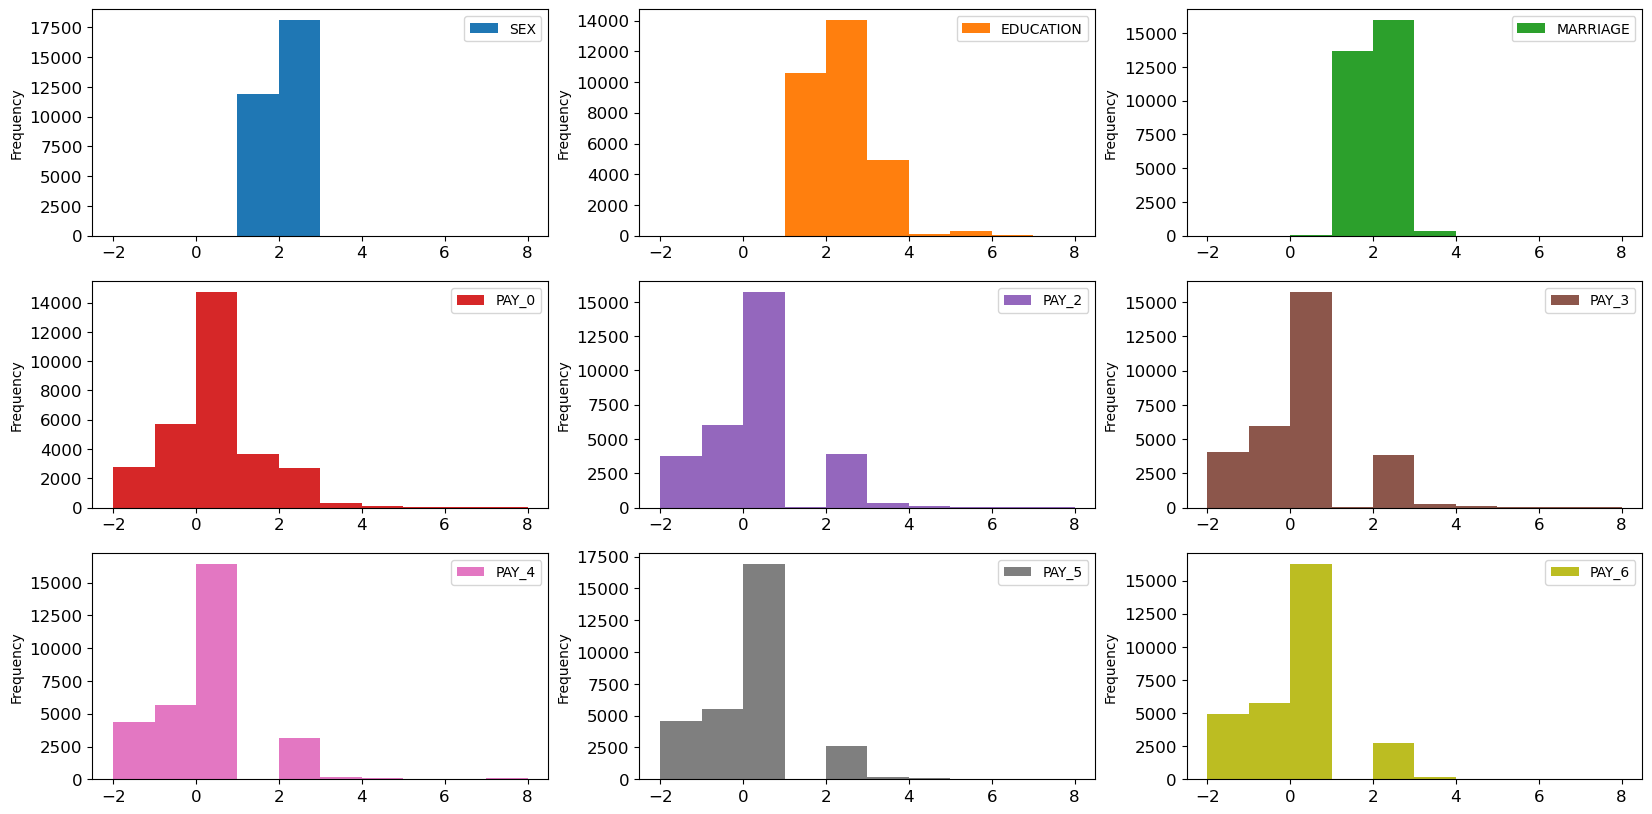

In [6]:
new_df = df.drop("LIMIT_BAL", axis=1).drop("AGE", axis=1)
data_mean = new_df.iloc[:, :9]
data_mean.plot(kind='hist', subplots=True, layout=(3,3), sharex=False,
sharey=False, fontsize=12, figsize=(20,10));

Yes = 1, No = 0

In [7]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

histogram plot for default payment

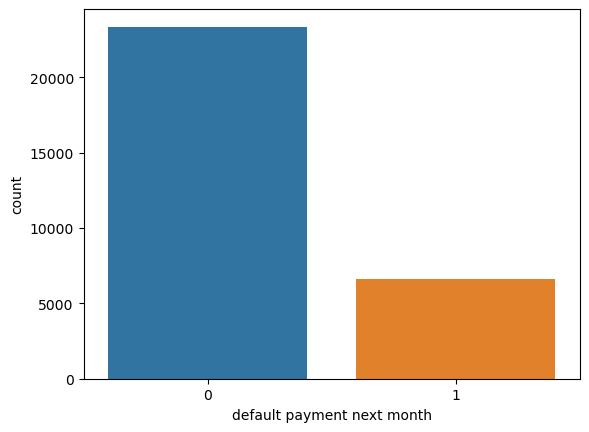

In [8]:
sns.countplot(x='default payment next month', data=df)

1 = male
2 = female

In [9]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

1 = graduate school; 2 = university; 3 = high school; 4 = others

In [10]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

1 = married; 2 = single; 3 = others

In [11]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

Plot a Correlation materix to evaluate the realationship between variables

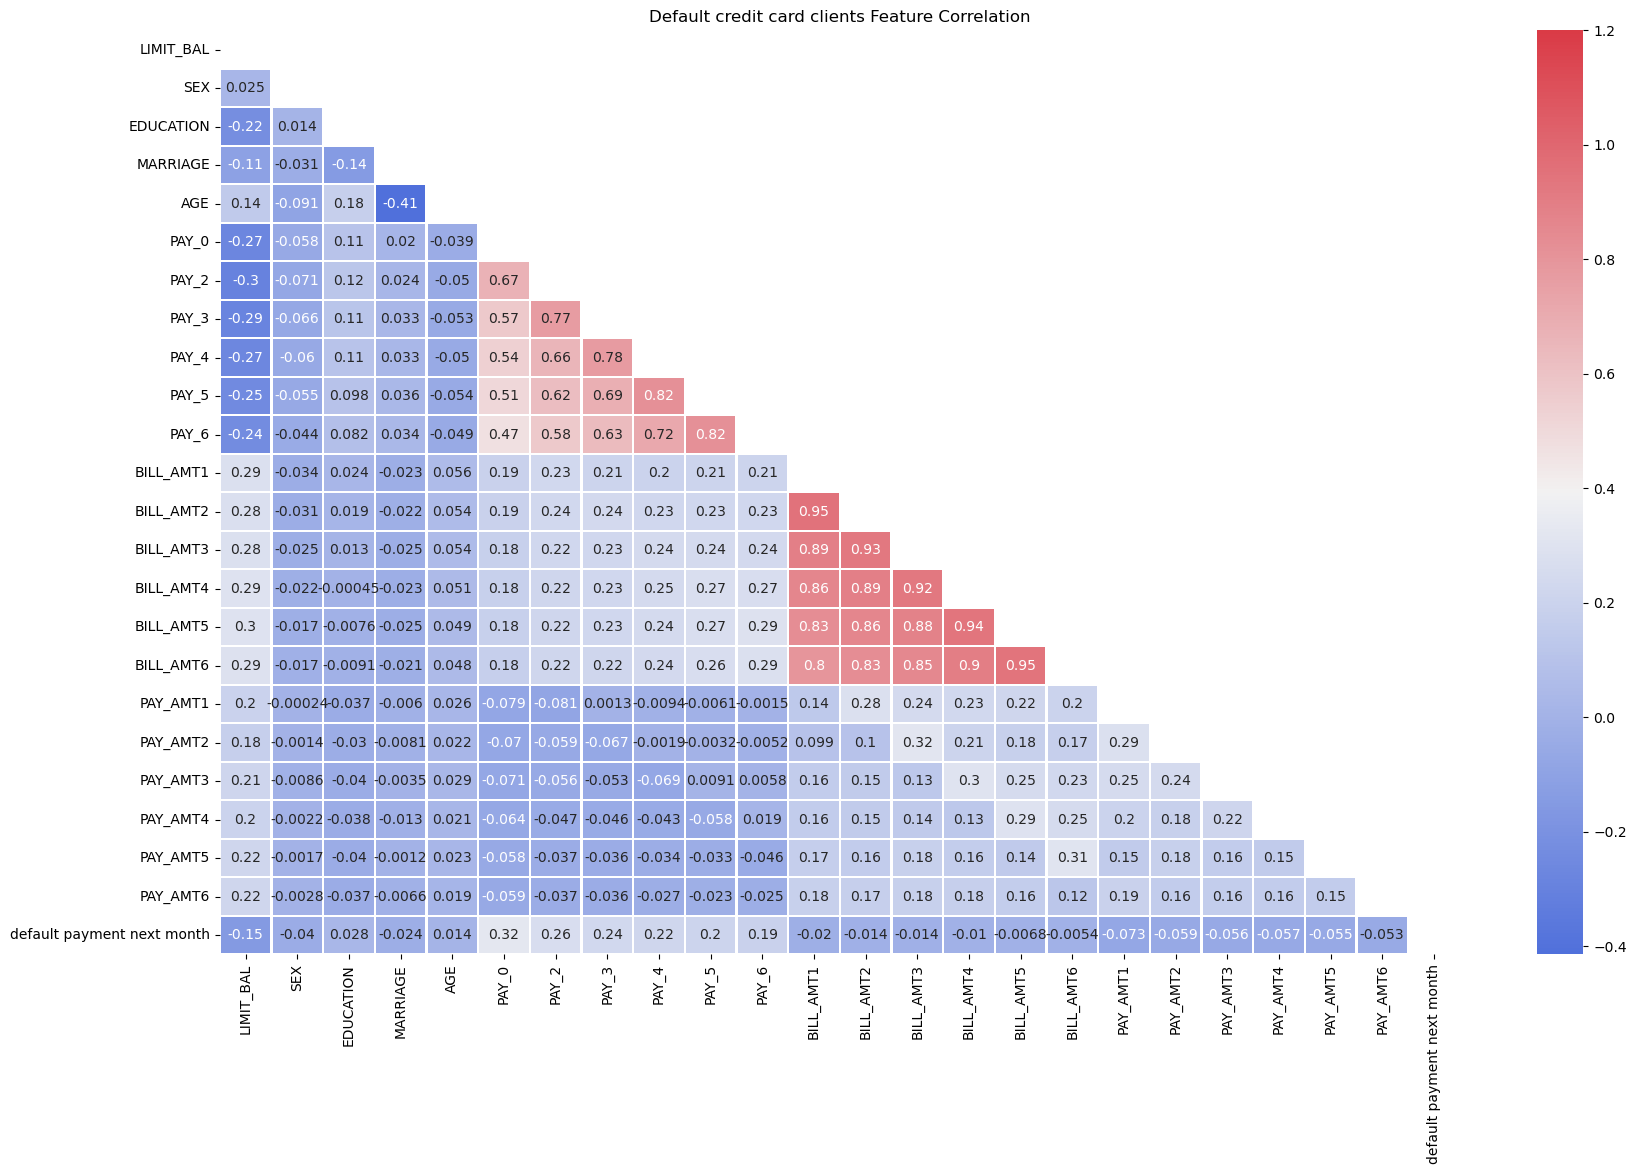

In [12]:
corrMatt = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Default credit card clients Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask,
ax=ax, annot=True, fmt='.2g', linewidths=1);

Scatter plot for detailed relationship checking

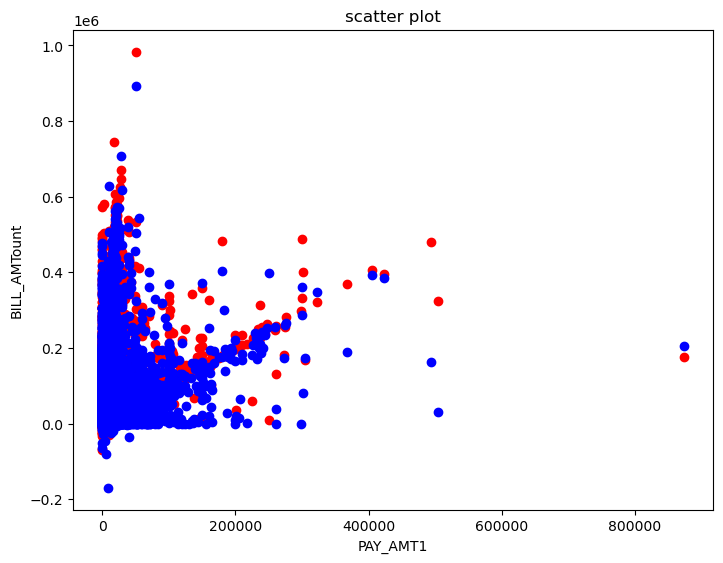

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(df['PAY_AMT1'], df['BILL_AMT2'], color='r')
ax.scatter(df['PAY_AMT1'], df['BILL_AMT4'], color='b')
ax.set_xlabel('PAY_AMT1')
ax.set_ylabel('BILL_AMTount')
ax.set_title('scatter plot')
plt.show()

Let Xs be the features

Set y to be the results

In [14]:
# assign numerical label to y
Xs = df.drop("default payment next month", axis=1)
y = df['default payment next month']
Xs.head(1)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0


<h1> model building

<h3>Decision tree

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)

In [16]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf = KFold(n_splits=5)
k=1
bestScore = 0
bestModel = None
for train_index, test_index in kf.split(Xs, y):
    print("fold",k)
 
    X_train, X_test = np.array(Xs)[train_index], np.array(Xs)[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    
    # training and validation
    dt.fit(X_train, y_train)

    # evaluate the accuracy of each fold
    y_pred = dt.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if(score > bestScore):
        bestScore = score
        bestModel = dt
    print("%s: %.2f%%" % ("Classification accuracy", score*100))
    k=k+1

fold 1
Classification accuracy: 80.00%
fold 2
Classification accuracy: 79.42%
fold 3
Classification accuracy: 80.52%
fold 4
Classification accuracy: 83.07%
fold 5
Classification accuracy: 81.68%


Normalize data using Z-norm

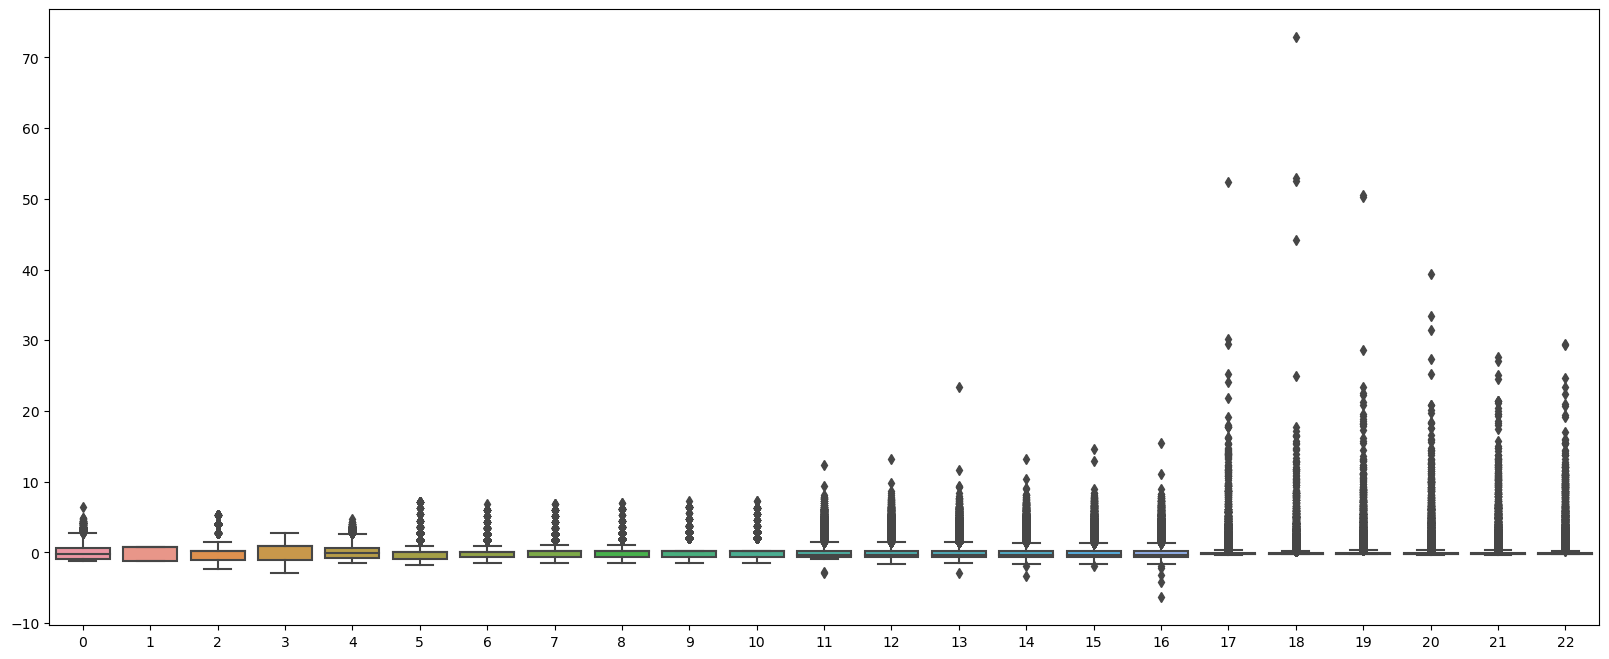

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(Xs)
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=Xs,ax=ax)

<h3>SVM

In [18]:
from sklearn.svm import SVC
svm = SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=False)

In [21]:
kf = KFold(n_splits=2)
k=1
bestScore = 0
bestModel = None
for train_index, test_index in kf.split(Xs):
    print("fold",k)
 
    X_train, X_test = np.array(Xs)[train_index], np.array(Xs)[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    
    # training and validation
    svm.fit(np.array(X_train), np.array(y_train))

    # evaluate the accuracy of each fold
    y_pred = svm.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if(score > bestScore):
        bestScore = score
        bestModel = svm
    print("%s: %.2f%%" % ("Classification accuracy", score*100))
    k=k+1

fold 1
Classification accuracy: 80.80%
fold 2
Classification accuracy: 82.64%


<h3>Logistic regression 

In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
kf = KFold(n_splits=5)
k=1
bestScore = 0
bestModel = None
for train_index, test_index in kf.split(Xs):
    print("fold",k)
 
    X_train, X_test = np.array(Xs)[train_index], np.array(Xs)[test_index]
    y_train, y_test = np.array(y)[train_index], np.array(y)[test_index]
    
    # training and validation
    lr.fit(np.array(X_train), np.array(y_train))

    # evaluate the accuracy of each fold
    y_pred = lr.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if(score > bestScore):
        bestScore = score
        bestModel = lr
    print("%s: %.2f%%" % ("Classification accuracy", score*100))
    k=k+1

fold 1
Classification accuracy: 80.47%
fold 2
Classification accuracy: 79.83%
fold 3
Classification accuracy: 79.87%
fold 4
Classification accuracy: 82.77%
fold 5
Classification accuracy: 81.92%


<h3>ANN

In [ ]:
from tensorflow import keras

model=keras.models.Sequential()
model.add(keras.layers.Dense(10, input_dim=23,activation="relu"))
model.add(keras.layers.Dense(1,activation='relu'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                240       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 251
Trainable params: 251
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss="binary_crossentropy", optimizer="sgd",
metrics=["accuracy"])
# save the initial weight for initilise new models in cross validation
model.save_weights('model.h5')


In [23]:
from sklearn.model_selection import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2,
random_state=1, stratify=y)

In [ ]:
# Now we can start the training
# Tensorflow/Keras uses np array, so need to convert the data format
#make sure the weights are initialised
model.load_weights('model.h5')
history= model.fit(np.array(Xs_train), np.array(y_train), epochs=50,
validation_data=(np.array(Xs_test), np.array(y_test)))


Epoch 1/50
750/750 [==============================] - 2s 2ms/step - loss: 3.2523 - accuracy: 0.7745 - val_loss: 3.4880 - val_accuracy: 0.7442
Epoch 2/50
750/750 [==============================] - 2s 2ms/step - loss: 3.3930 - accuracy: 0.7668 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 3/50
750/750 [==============================] - 2s 2ms/step - loss: 3.4121 - accuracy: 0.7788 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 4/50
750/750 [==============================] - 2s 2ms/step - loss: 3.4121 - accuracy: 0.7788 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 5/50
750/750 [==============================] - 2s 2ms/step - loss: 3.4121 - accuracy: 0.7788 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 6/50
750/750 [==============================] - 2s 2ms/step - loss: 3.4121 - accuracy: 0.7788 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 7/50
750/750 [==============================] - 2s 2ms/step - loss: 3.4121 - accuracy: 0.7788 - val_loss: 3.4115 - val_accuracy: 0.7788
Epoch 

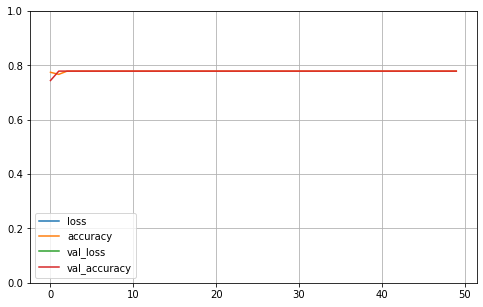

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) 
plt.show()

In [ ]:
kf = KFold(n_splits=5)
k=1


In [ ]:
for train_index, test_index in kf.split(Xs):
    print("fold",k)
 # initialise the weight for each fold
    model.load_weights('model.h5')
# Split the data
    X_train, X_test = Xs[train_index], Xs[test_index]
    y_train, y_test = y[train_index], y[test_index]
    # tensorboard for visualising the training process later
    tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
    # training and validation
    model.fit(np.array(X_train), np.array(y_train), epochs=10,
    validation_data=(np.array(X_test),
    np.array(y_test)),callbacks=[tensorboard_cb])

    #save the model of each fold
    model.save(os.path.join('fold_{}_model.hdf5'.format(k)))

    # evaluate the accuracy of each fold
    scores = model.evaluate(np.array(X_test), np.array(y_test), verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    k=k+1


fold 1
Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 2.9782 - accuracy: 0.7712 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 2/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 3/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 4/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 5/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 3.4211 - accuracy: 0.7782 - val_loss: 3.3755 - val_accuracy: 0.7812